In [1]:
import nest_asyncio
nest_asyncio.apply()
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from hddCRP.newContextModel3 import load_turns_and_locations
from hddCRP.newContextModel3 import create_pop_model

In [2]:
model = create_pop_model("uniform")
model.build(random_seed=901)
model.fit_model()

Building...



Building: 31.3s, done.Messages from stanc:
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    no prior is provided, or the prior(s) depend on data variables. In the
    later case, this may be a false positive.
    no prior is provided, or the prior(s) depend on data variables. In the
    later case, this may be a false positive.
    prior is provided, or the prior(s) depend on data variables. In the later
    case, this may be a false positive.
    prior is provided, or the prior(s) depend on data variables. In the later
    case, this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (

<stan.Fit>
Parameters:
    alpha: (3,)
    timeconstant: ()
    subject_similarity_a: ()
    subject_similarity_b: ()
    context_a_depth_1: ()
    context_b_depth_1: ()
Draws: 4000

In [3]:
model_d = create_pop_model("diverse")
model_d.build(random_seed=902)
model_d.fit_model()

Building...



Building: found in cache, done.Messages from stanc:
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    no prior is provided, or the prior(s) depend on data variables. In the
    later case, this may be a false positive.
    no prior is provided, or the prior(s) depend on data variables. In the
    later case, this may be a false positive.
    prior is provided, or the prior(s) depend on data variables. In the later
    case, this may be a false positive.
    prior is provided, or the prior(s) depend on data variables. In the later
    case, this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Samplin

<stan.Fit>
Parameters:
    alpha: (3,)
    timeconstant: ()
    subject_similarity_a: ()
    subject_similarity_b: ()
    context_a_depth_1: ()
    context_b_depth_1: ()
Draws: 4000

In [4]:
fit_df_u = model.fit.to_frame()
fit_df_d = model_d.fit.to_frame()

fit_df_u = fit_df_u.assign(grp="uniform")
fit_df_d = fit_df_d.assign(grp="diverse")

fits = pd.concat([fit_df_d,fit_df_u])
fits.keys()

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'alpha.1', 'alpha.2', 'alpha.3',
       'timeconstant', 'subject_similarity_a', 'subject_similarity_b',
       'context_a_depth_1', 'context_b_depth_1', 'grp'],
      dtype='object', name='parameters')

/home/latimerk/miniconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/latimerk/miniconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/latimerk/miniconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/latimerk/miniconda3/envs

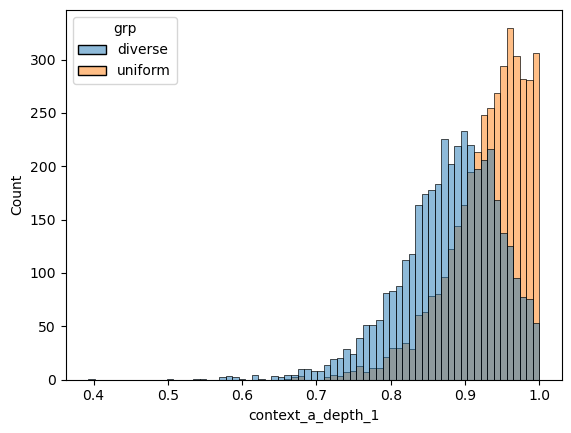

In [5]:
sns.histplot(data=fits,x="context_a_depth_1", hue="grp");

/home/latimerk/miniconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/latimerk/miniconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/latimerk/miniconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/latimerk/miniconda3/envs

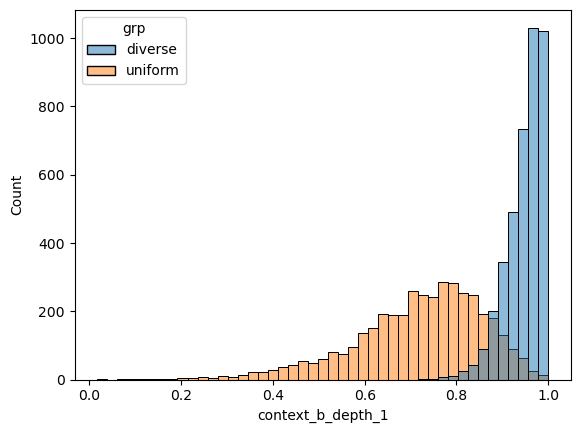

In [6]:
sns.histplot(data=fits,x="context_b_depth_1", hue="grp");

In [7]:
Y,R = load_turns_and_locations("A1")

print(Y[0][:10])
print(R[0][:10])

[2 2 0 0 0 0 0 0 1 1]
[2 1 0 1 2 3 0 1 2 0]
